In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ROOT = Path("..").resolve()
DATA_TRAIN = ROOT / "data" / "train"
IMAGES = ROOT / "images"

# load training set created in ida.ipynb
train = pd.read_csv(DATA_TRAIN / "housing_train.csv")
train.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


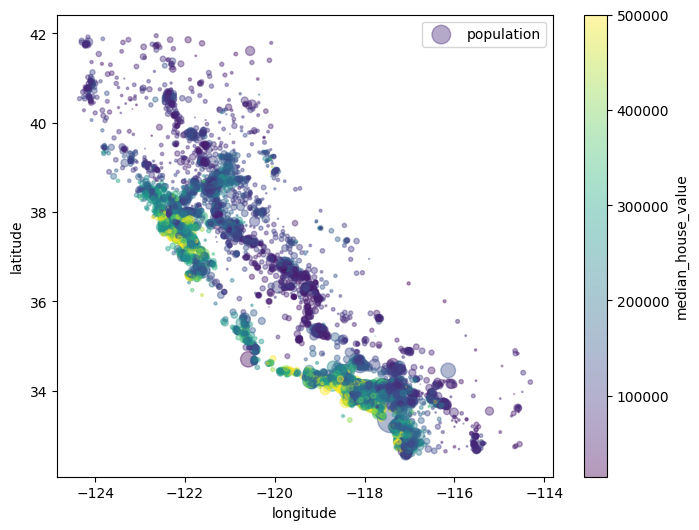

In [2]:
train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
           s=train["population"]/100, label="population",
           c="median_house_value", cmap="viridis", colorbar=True, figsize=(8,6))
plt.legend()
plt.savefig(IMAGES / "geo_map.png", dpi=150)
plt.show()


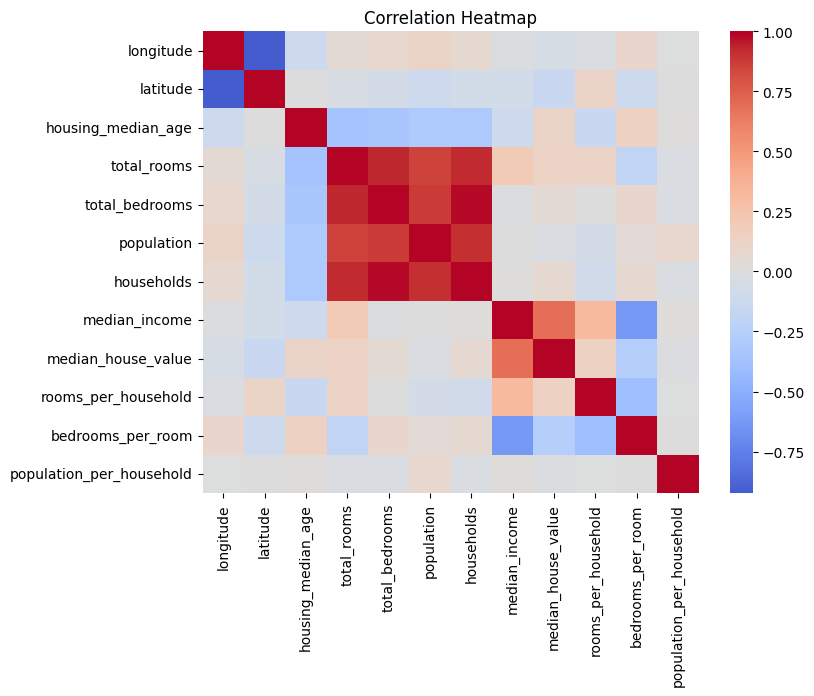

In [3]:
corr = train.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.savefig(IMAGES / "corr_heatmap_processed.png", dpi=150)
plt.show()


In [4]:
train["rooms_per_household"] = train["total_rooms"] / train["households"]
train["bedrooms_per_room"] = train["total_bedrooms"] / train["total_rooms"]
train["population_per_household"] = train["population"] / train["households"]

# you can add more engineered features here, e.g. log transforms or interactions
train.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [5]:
processed_path = DATA_TRAIN / "housing_train_processed.csv"
train.to_csv(processed_path, index=False)
print("Saved:", processed_path)


Saved: C:\Users\MaxGillum\Desktop\492 ML PJ\cmse492_aml\ca_housing_project\data\train\housing_train_processed.csv
